In [13]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import cifar100
from keras.utils import to_categorical
from keras.optimizers import Adam
from keras.regularizers import l2

(x_train, y_train), (x_test, y_test) = cifar100.load_data()

x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [20]:
model_base= Sequential()
model_base.add(Flatten(input_shape=(32,32,3)))  # 1. Flatten layer (input)

model_base.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001))) # 1. Dense layer (input)
model_base.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))   # 2. Dense layer (hidden layer)
model_base.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))   # 3. Dense layer (hidden layer)
model_base.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))   # 4. Dense layer (hidden layer)
model_base.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))    # 5. Dense layer (hidden layer)

model_base.add(Dense(100, activation='softmax', kernel_regularizer=l2(0.001)))   # 2. Dense layer (single output layer)



In [22]:
model_base.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

res=model_base.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

model_base.evaluate(x_test, y_test)


Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 88ms/step - accuracy: 0.1407 - loss: 3.7665 - val_accuracy: 0.1374 - val_loss: 3.7952
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 28s 90ms/step - accuracy: 0.1465 - loss: 3.7356 - val_accuracy: 0.1500 - val_loss: 3.7609
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 26s 82ms/step - accuracy: 0.1495 - loss: 3.7162 - val_accuracy: 0.1453 - val_loss: 3.7562
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 77ms/step - accuracy: 0.1552 - loss: 3.6867 - val_accuracy: 0.1428 - val_loss: 3.7561
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 78ms/step - accuracy: 0.1564 - loss: 3.6846 - val_accuracy: 0.1478 - val_loss: 3.7693
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.1609 - loss: 3.6722 - val_accuracy: 0.1549 - val_loss: 3.7116
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 25s 79ms/step - accuracy: 0.1661 - loss: 3.6514 - val_accuracy: 0.1456 - val_loss: 3.7740
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 24s 78ms/step - accuracy: 0.1646 - loss: 3.6515 - 

[3.6594078540802, 0.16769999265670776]

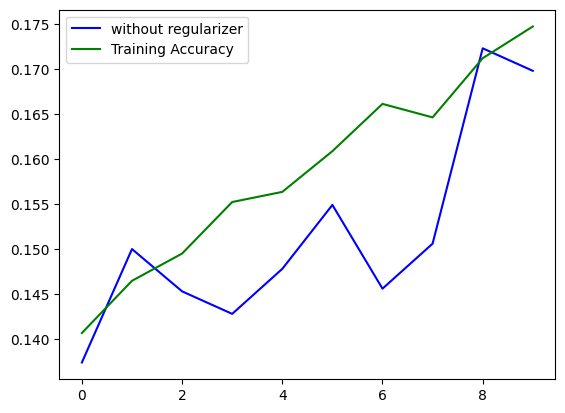

In [24]:
import matplotlib.pyplot as plt
plt.plot(res.history['val_accuracy'], label='without regularizer', color='blue')
plt.plot(res.history['accuracy'], label='Training Accuracy', color='green')
plt.legend()
